# Variational AutoEncoder - MNIST

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import os
import sys
# path를 append: 나의 source directory는 Google Disk의 Colab Notebooks/Lecture 아래에 있다고 가정
sys.path.append('/content/drive/My Drive/Colab Notebooks/Lecture')
# local library인 utils.loaders와 models.AE class를 import
from utils.loaders import load_mnist, load_model
from models.VAE import VariationalAutoencoder
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

Using TensorFlow backend.


In [0]:
# 실행 매개변수
SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = '/content/drive/My Drive/Colab Notebooks/Lecture/run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## Loading Data

In [9]:
(x_train, y_train), (x_test, y_test) = load_mnist()

11493376/11490434 [==============================] - 1s 0us/step


## Model Creation

In [0]:
vae = VariationalAutoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [11]:
vae.encoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 28, 28, 32)   0           encoder_conv_0[0][0]             
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 14, 14, 64)   18496       leaky_re_lu_1[0][0]              
____________________________________________________________________________________________

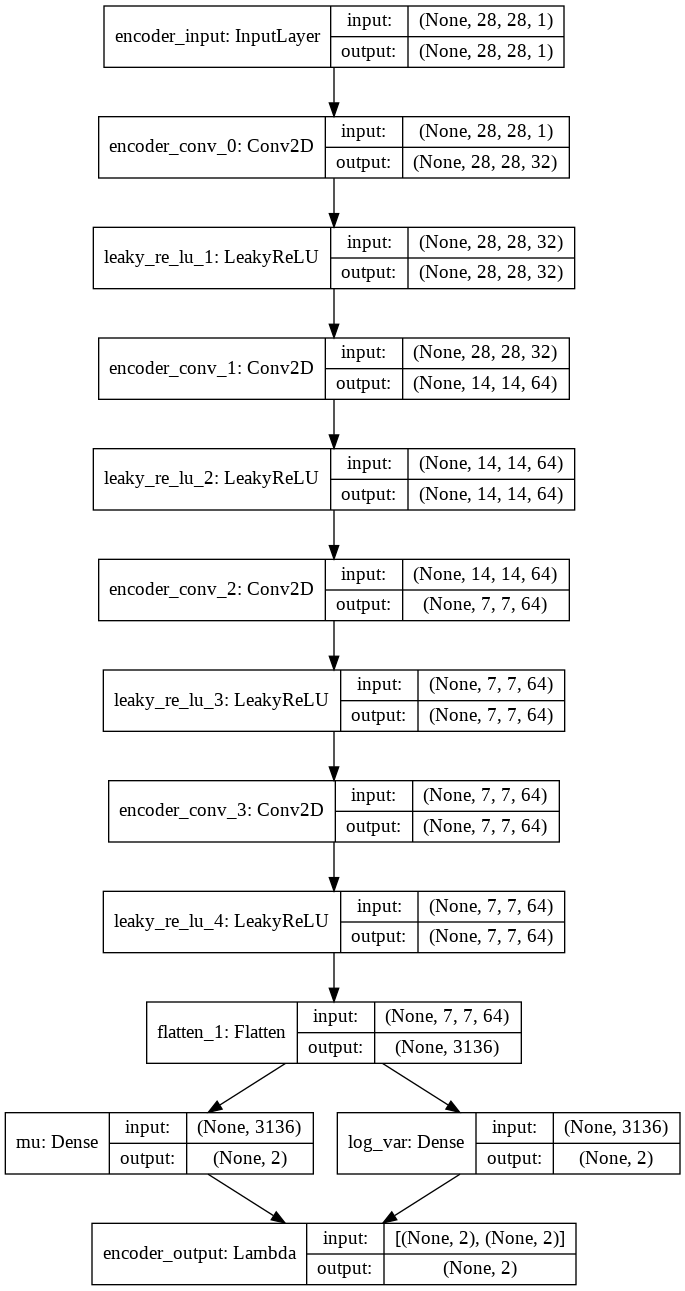

In [12]:
from keras.utils import plot_model
plot_model(vae.encoder, to_file='vae_encoder.png', show_shapes = True, show_layer_names = True)

![VAE Encoder](vae_encoder.png "VAE Encoder")

In [13]:
vae.decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0   

## Training Model

In [0]:
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1000

In [0]:
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)

In [0]:
BATCH_SIZE = 32
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [17]:
vae.train(     
    x_train[:10000]
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
10000/10000 [==============================] - 9s 902us/step - loss: 75.2903 - vae_r_loss: 72.5288 - vae_kl_loss: 2.7614

Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-001-75.29.h5

Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 2/200
10000/10000 [==============================] - 2s 236us/step - loss: 57.5810 - vae_r_loss: 54.6758 - vae_kl_loss: 2.9051

Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-002-57.58.h5

Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 3/200
10000/10000 [==============================] - 2s 238us/step - loss: 55.9070 - vae_r_loss: 52.7899 - vae_kl_loss: 3.1171

Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.132807). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 2s 239us/step - loss: 50.9917 - vae_r_loss: 46.9566 - vae_kl_loss: 4.0352

Epoch 00010: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-010-50.99.h5

Epoch 00010: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 11/200
10000/10000 [==============================] - 2s 230us/step - loss: 50.6428 - vae_r_loss: 46.5034 - vae_kl_loss: 4.1394

Epoch 00011: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-011-50.64.h5

Epoch 00011: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 12/200
10000/10000 [==============================] - 2s 233us/step - loss: 50.2523 - vae_r_loss: 46.0683 - vae_kl_loss: 4.1840

Epoch 00012: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-012-50.25

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.130884). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 2s 245us/step - loss: 47.9809 - vae_r_loss: 43.3723 - vae_kl_loss: 4.6086

Epoch 00024: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-024-47.98.h5

Epoch 00024: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 25/200
10000/10000 [==============================] - 2s 231us/step - loss: 47.8643 - vae_r_loss: 43.2641 - vae_kl_loss: 4.6003

Epoch 00025: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-025-47.86.h5

Epoch 00025: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 26/200
10000/10000 [==============================] - 2s 232us/step - loss: 47.8310 - vae_r_loss: 43.1830 - vae_kl_loss: 4.6480

Epoch 00026: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-026-47.83

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.128469). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 2s 249us/step - loss: 46.1444 - vae_r_loss: 41.2026 - vae_kl_loss: 4.9418

Epoch 00046: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-046-46.14.h5

Epoch 00046: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 47/200
10000/10000 [==============================] - 2s 232us/step - loss: 46.2307 - vae_r_loss: 41.2823 - vae_kl_loss: 4.9484

Epoch 00047: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-047-46.23.h5

Epoch 00047: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 48/200
10000/10000 [==============================] - 2s 235us/step - loss: 46.0870 - vae_r_loss: 41.1662 - vae_kl_loss: 4.9208

Epoch 00048: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-048-46.09

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.154176). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 2s 250us/step - loss: 44.9778 - vae_r_loss: 39.8865 - vae_kl_loss: 5.0913

Epoch 00070: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-070-44.98.h5

Epoch 00070: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 71/200
10000/10000 [==============================] - 2s 234us/step - loss: 44.9549 - vae_r_loss: 39.8426 - vae_kl_loss: 5.1122

Epoch 00071: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-071-44.95.h5

Epoch 00071: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 72/200
10000/10000 [==============================] - 2s 233us/step - loss: 44.9860 - vae_r_loss: 39.8460 - vae_kl_loss: 5.1400

Epoch 00072: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-072-44.99

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.162666). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 255us/step - loss: 44.7109 - vae_r_loss: 39.5506 - vae_kl_loss: 5.1602

Epoch 00078: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-078-44.71.h5

Epoch 00078: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 79/200
10000/10000 [==============================] - 2s 243us/step - loss: 44.6993 - vae_r_loss: 39.5268 - vae_kl_loss: 5.1725

Epoch 00079: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-079-44.70.h5

Epoch 00079: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 80/200
10000/10000 [==============================] - 3s 258us/step - loss: 44.6012 - vae_r_loss: 39.4365 - vae_kl_loss: 5.1647

Epoch 00080: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-080-44.60

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.148263). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 2s 247us/step - loss: 43.8675 - vae_r_loss: 38.5790 - vae_kl_loss: 5.2885

Epoch 00104: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-104-43.87.h5

Epoch 00104: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 105/200
10000/10000 [==============================] - 2s 234us/step - loss: 43.8920 - vae_r_loss: 38.5734 - vae_kl_loss: 5.3186

Epoch 00105: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-105-43.89.h5

Epoch 00105: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 106/200
10000/10000 [==============================] - 2s 245us/step - loss: 43.9458 - vae_r_loss: 38.6425 - vae_kl_loss: 5.3033

Epoch 00106: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-106-43.

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.136520). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 252us/step - loss: 42.9195 - vae_r_loss: 37.4608 - vae_kl_loss: 5.4587

Epoch 00154: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-154-42.92.h5

Epoch 00154: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 155/200
10000/10000 [==============================] - 2s 237us/step - loss: 42.9478 - vae_r_loss: 37.4759 - vae_kl_loss: 5.4719

Epoch 00155: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-155-42.95.h5

Epoch 00155: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 156/200
10000/10000 [==============================] - 2s 236us/step - loss: 42.9877 - vae_r_loss: 37.5246 - vae_kl_loss: 5.4632

Epoch 00156: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-156-42.

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.150507). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 2s 244us/step - loss: 42.6019 - vae_r_loss: 37.0445 - vae_kl_loss: 5.5574

Epoch 00191: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-191-42.60.h5

Epoch 00191: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 192/200
10000/10000 [==============================] - 2s 228us/step - loss: 42.4602 - vae_r_loss: 36.9235 - vae_kl_loss: 5.5367

Epoch 00192: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-192-42.46.h5

Epoch 00192: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 193/200
10000/10000 [==============================] - 2s 227us/step - loss: 42.4849 - vae_r_loss: 36.9181 - vae_kl_loss: 5.5669

Epoch 00193: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-193-42.

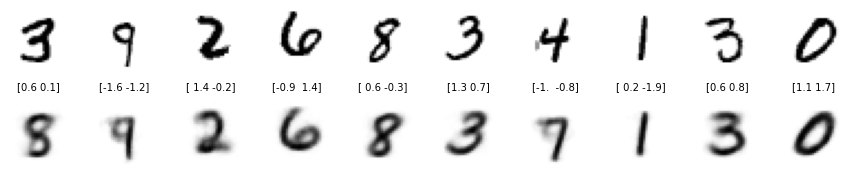

In [18]:
## Reconstructing Original Images

n_to_show = 10
np.random.seed(88)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')

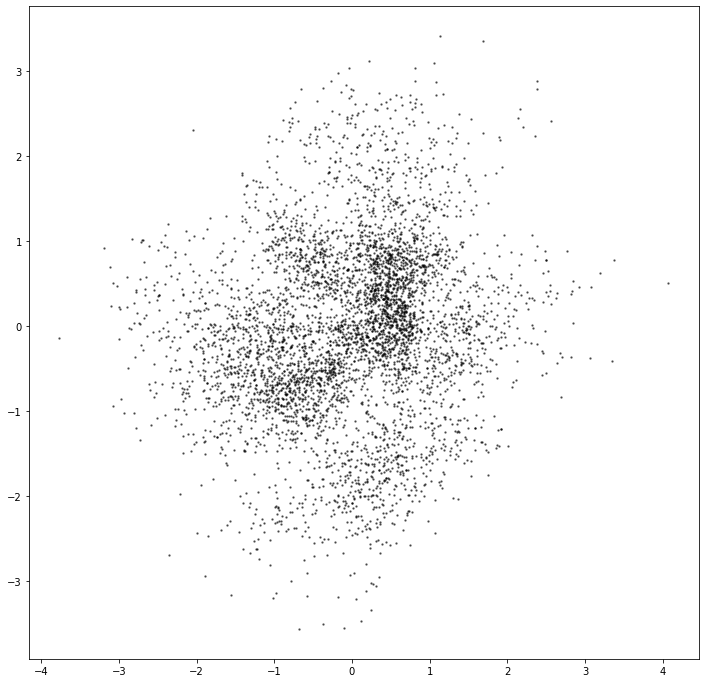

In [19]:
# Visualizing Latent Space
n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

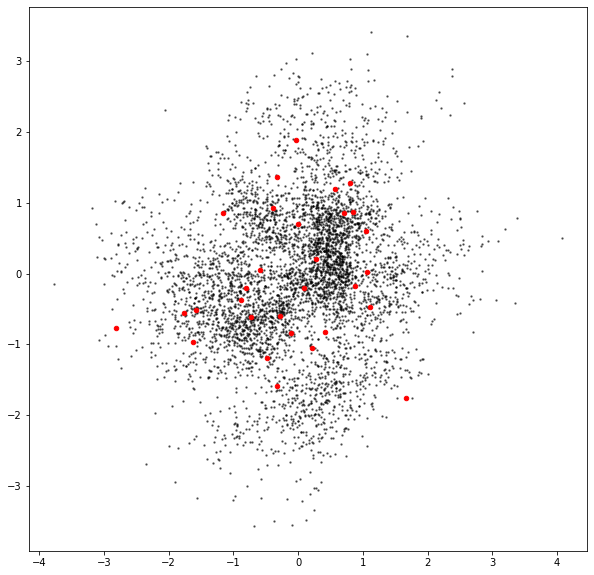

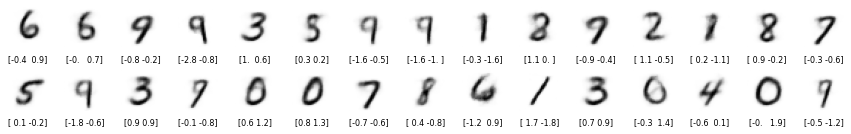

In [20]:
## Reconstruction from Non-Input point
figsize = 10
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)


grid_size = 15
grid_depth = 2
figsize = 15

x = np.random.normal(size = grid_size * grid_depth)
y = np.random.normal(size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y)))
reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=8, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

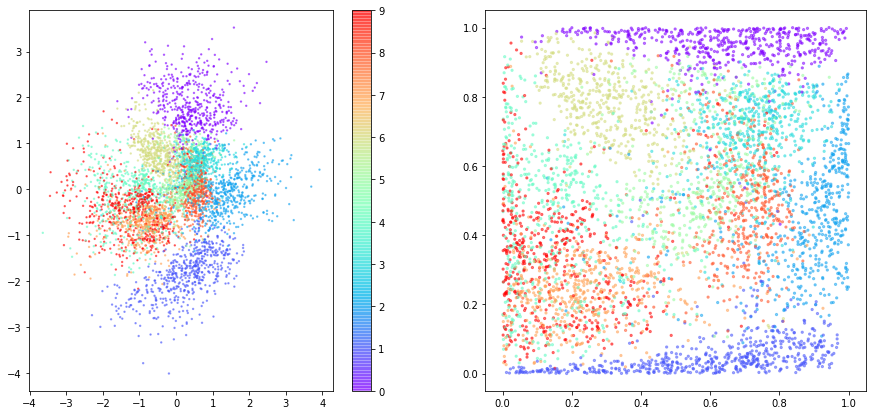

In [21]:
n_to_show = 5000
grid_size = 15
fig_height = 7
fig_width = 15

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)
p_points = norm.cdf(z_points)

fig = plt.figure(figsize=(fig_width, fig_height))

ax = fig.add_subplot(1, 2, 1)
plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c=example_labels
            , alpha=0.5, s=2)
plt.colorbar(plot_1)

ax = fig.add_subplot(1, 2, 2)
plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , c=example_labels
            , alpha=0.5, s=5)

plt.show()

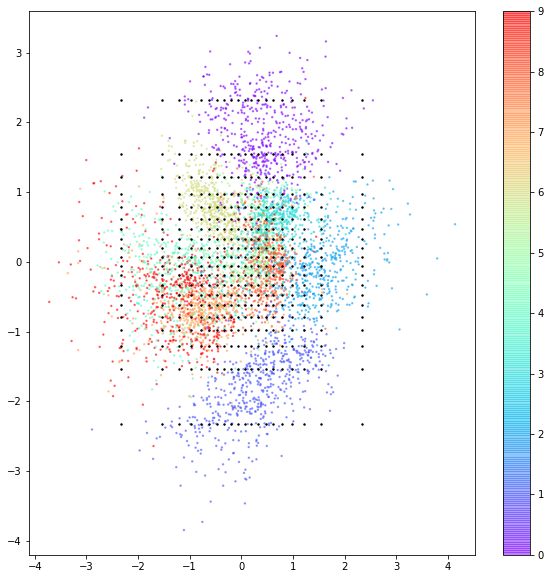

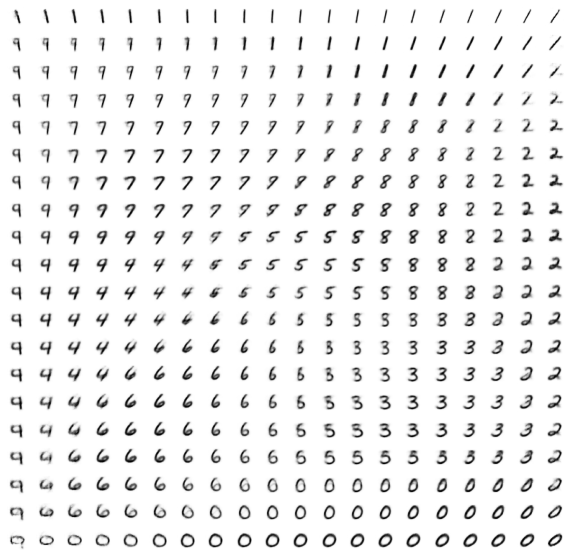

In [22]:
n_to_show = 5000
grid_size = 20
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=2)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

# 비교하는 모델 만들기

In [0]:
vae = VariationalAutoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 3 # 이 부분 수정함
)

if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [0]:
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1000

In [0]:
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)

In [0]:
BATCH_SIZE = 32
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [27]:
vae.train(     
    x_train[:10000]
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
10000/10000 [==============================] - 3s 281us/step - loss: 73.5817 - vae_r_loss: 70.0416 - vae_kl_loss: 3.5401

Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-001-73.58.h5

Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 2/200
10000/10000 [==============================] - 2s 234us/step - loss: 53.3282 - vae_r_loss: 48.9257 - vae_kl_loss: 4.4025

Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-002-53.33.h5

Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 3/200
10000/10000 [==============================] - 2s 247us/step - loss: 50.2209 - vae_r_loss: 45.3546 - vae_kl_loss: 4.8663

Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.166947). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 252us/step - loss: 47.0675 - vae_r_loss: 41.6639 - vae_kl_loss: 5.4035

Epoch 00006: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-006-47.07.h5

Epoch 00006: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 7/200
10000/10000 [==============================] - 2s 235us/step - loss: 46.6981 - vae_r_loss: 41.1945 - vae_kl_loss: 5.5036

Epoch 00007: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-007-46.70.h5

Epoch 00007: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 8/200
10000/10000 [==============================] - 2s 248us/step - loss: 46.1561 - vae_r_loss: 40.5816 - vae_kl_loss: 5.5745

Epoch 00008: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-008-46.16.h

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.152539). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 254us/step - loss: 42.5566 - vae_r_loss: 36.2746 - vae_kl_loss: 6.2820

Epoch 00026: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-026-42.56.h5

Epoch 00026: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 27/200
10000/10000 [==============================] - 2s 242us/step - loss: 42.3427 - vae_r_loss: 36.0579 - vae_kl_loss: 6.2848

Epoch 00027: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-027-42.34.h5

Epoch 00027: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 28/200
10000/10000 [==============================] - 2s 240us/step - loss: 42.2901 - vae_r_loss: 35.9874 - vae_kl_loss: 6.3027

Epoch 00028: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-028-42.29

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.130310). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 2s 246us/step - loss: 41.2857 - vae_r_loss: 34.7949 - vae_kl_loss: 6.4907

Epoch 00041: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-041-41.29.h5

Epoch 00041: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 42/200
10000/10000 [==============================] - 2s 233us/step - loss: 41.3093 - vae_r_loss: 34.7658 - vae_kl_loss: 6.5435

Epoch 00042: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-042-41.31.h5

Epoch 00042: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 43/200
10000/10000 [==============================] - 2s 236us/step - loss: 41.3175 - vae_r_loss: 34.7750 - vae_kl_loss: 6.5425

Epoch 00043: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-043-41.32

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.109912). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 2s 243us/step - loss: 38.6549 - vae_r_loss: 31.5891 - vae_kl_loss: 7.0658

Epoch 00125: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-125-38.65.h5

Epoch 00125: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 126/200
10000/10000 [==============================] - 2s 236us/step - loss: 38.6390 - vae_r_loss: 31.5622 - vae_kl_loss: 7.0768

Epoch 00126: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-126-38.64.h5

Epoch 00126: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 127/200
10000/10000 [==============================] - 2s 238us/step - loss: 38.5879 - vae_r_loss: 31.5282 - vae_kl_loss: 7.0597

Epoch 00127: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-127-38.

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.128187). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 2s 245us/step - loss: 38.2956 - vae_r_loss: 31.1827 - vae_kl_loss: 7.1129

Epoch 00147: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-147-38.30.h5

Epoch 00147: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 148/200
10000/10000 [==============================] - 2s 234us/step - loss: 38.2259 - vae_r_loss: 31.1180 - vae_kl_loss: 7.1079

Epoch 00148: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-148-38.23.h5

Epoch 00148: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 149/200
10000/10000 [==============================] - 2s 244us/step - loss: 38.1998 - vae_r_loss: 31.0700 - vae_kl_loss: 7.1298

Epoch 00149: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-149-38.

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.148878). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 2s 248us/step - loss: 38.0286 - vae_r_loss: 30.8675 - vae_kl_loss: 7.1611

Epoch 00164: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-164-38.03.h5

Epoch 00164: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 165/200
10000/10000 [==============================] - 2s 234us/step - loss: 38.0962 - vae_r_loss: 30.8955 - vae_kl_loss: 7.2007

Epoch 00165: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-165-38.10.h5

Epoch 00165: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 166/200
10000/10000 [==============================] - 3s 251us/step - loss: 38.0809 - vae_r_loss: 30.9271 - vae_kl_loss: 7.1539

Epoch 00166: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-166-38.

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.154020). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10000/10000 [==============================] - 3s 251us/step - loss: 37.8009 - vae_r_loss: 30.5881 - vae_kl_loss: 7.2129

Epoch 00189: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-189-37.80.h5

Epoch 00189: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 190/200
10000/10000 [==============================] - 2s 234us/step - loss: 37.8443 - vae_r_loss: 30.5985 - vae_kl_loss: 7.2459

Epoch 00190: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-190-37.84.h5

Epoch 00190: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights.h5
Epoch 191/200
10000/10000 [==============================] - 2s 247us/step - loss: 37.8191 - vae_r_loss: 30.5460 - vae_kl_loss: 7.2731

Epoch 00191: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0002_digits/weights/weights-191-37.

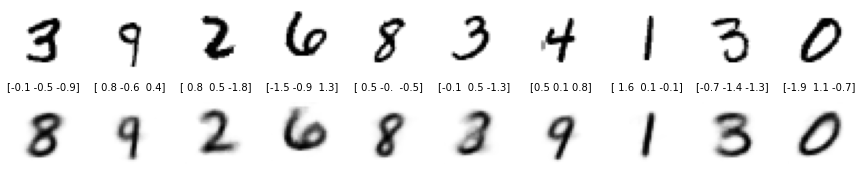

In [28]:
## Reconstructing Original Images

n_to_show = 10
np.random.seed(88)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')

z_dim = 2
**loss: 42.4249** - vae_r_loss: 36.8372 - vae_kl_loss: 5.5877

z_dim = 3
**loss: 37.6501** - vae_r_loss: 30.4048 - vae_kl_loss: 7.2453

전체적으로 latent space를 높였을 경우 VAE performance가 증가함을 알 수 있었다. (loss가 줄어듬)
